In [1]:
import pandas as pd
import numpy as np
import missingno
from collections import Counter

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

#model evaluation
from sklearn.model_selection import cross_val_score

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ss = pd.read_csv('gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("Training set shape: ",train.shape)
print("Test set shape: ",test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


In [6]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
ss.shape

(418, 2)

In [8]:
train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [9]:
#missing data in training set by columns
train.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


In [10]:
#missing data in test set by columns
test.isnull().sum().sort_values(ascending=False)

,0
Cabin,327
Age,86
Fare,1
PassengerId,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Ticket,0


<Axes: >

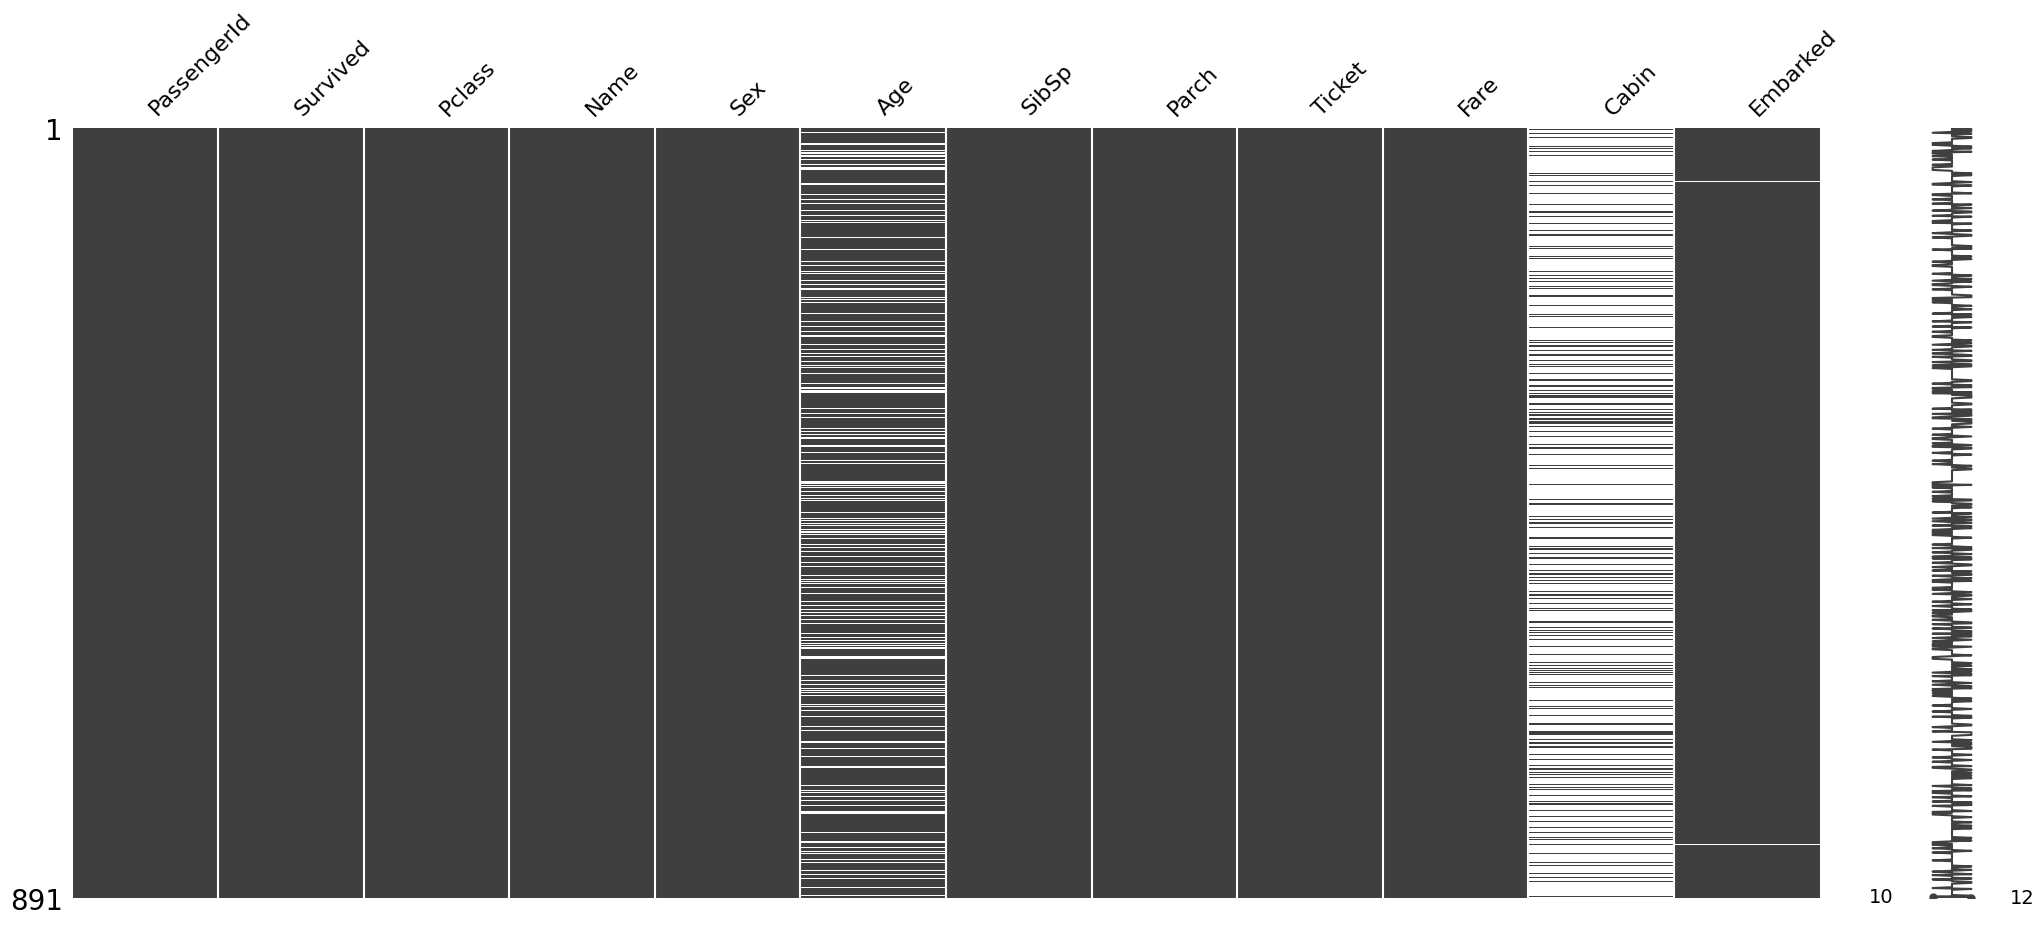

In [11]:
# missing data in training set
missingno.matrix(train)

In [12]:
# summary statistics for training set
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# summary statistics for test set
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
#value counts of the sex column
train['Sex'].value_counts(dropna=False)
# There are more male passengers than female passengers on titanic

,count
Sex,
male,577
female,314


In [15]:
#mean of survival by sex
train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

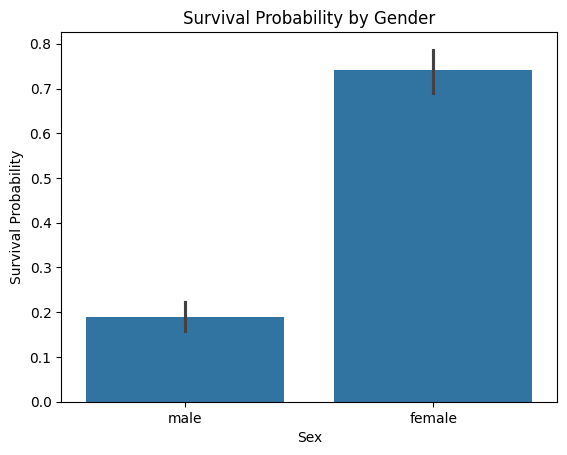

In [16]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

#Female passengers are more likely to survive

In [17]:
#value counts of the Pclass column
train['Pclass'].value_counts(dropna=False)

,count
Pclass,
3,491
1,216
2,184


In [18]:
#mean of survival by passenger class
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

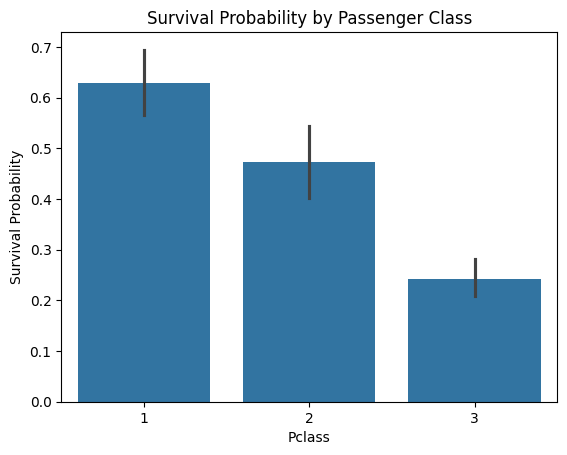

In [19]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

#Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

Text(0.5, 1.0, 'Survival Probabaility by sex and passenger class')

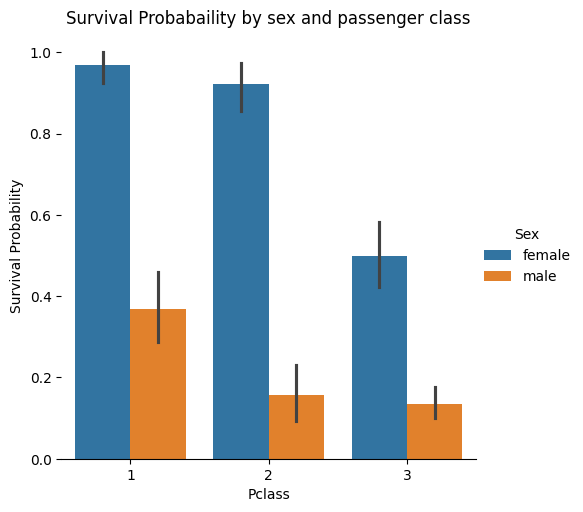

In [20]:
#survival by gender and passenger class
import seaborn as sns
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='bar')

g.despine(left = True)
plt.ylabel("Survival Probability")
plt.title("Survival Probabaility by sex and passenger class")

In [21]:
#value counts of the embarked column
train['Embarked'].value_counts(dropna=False)

#Two missing values in the embarked column

,count
Embarked,
S,644
C,168
Q,77
NaN,2


In [22]:
#mean of survival by point of embarkation
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

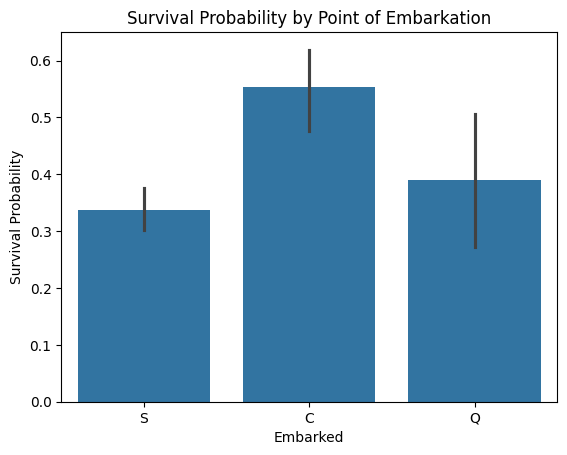

In [23]:
sns.barplot(x='Embarked', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')


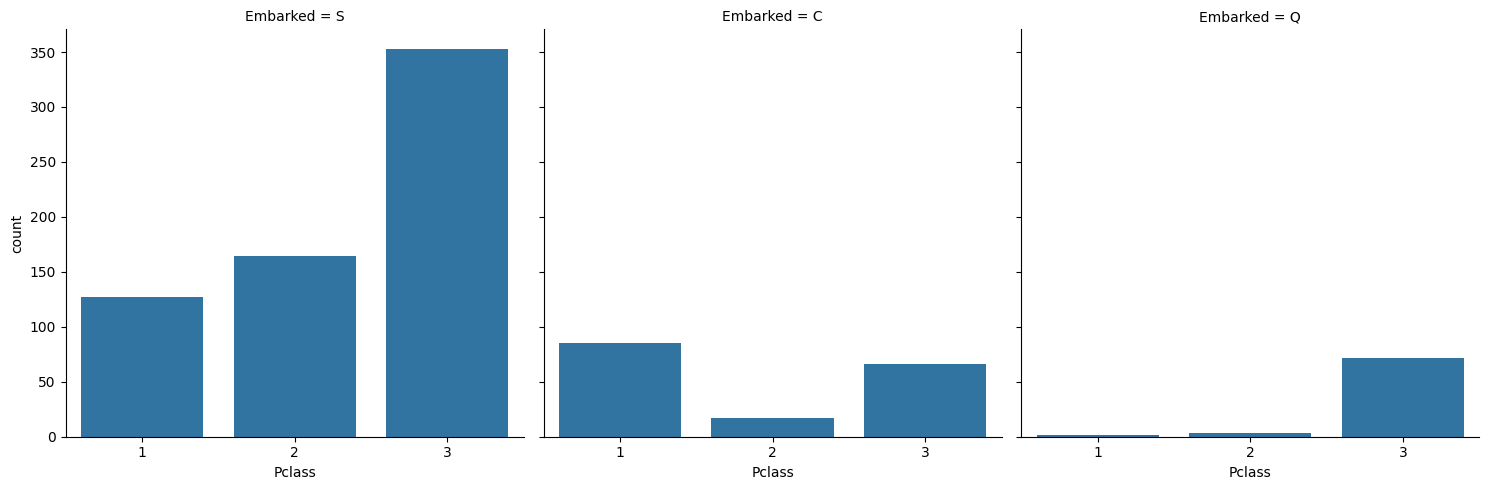

In [24]:
import seaborn as sns
g = sns.catplot(x='Pclass', col='Embarked', data=train, kind='count')


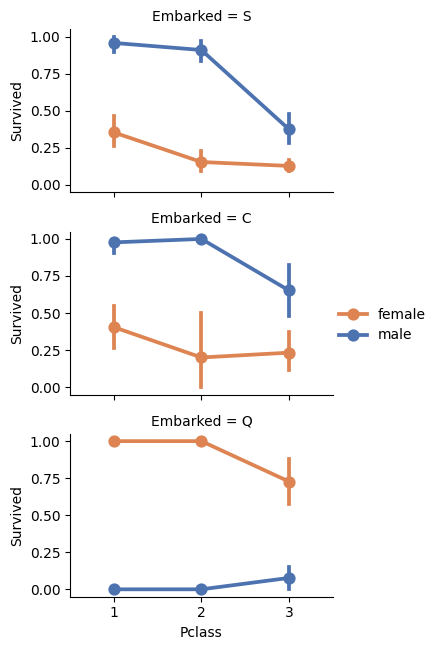

In [25]:
#survival probability by all categorical variables
import seaborn as sns
grid = sns.FacetGrid(train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()


In [26]:
def detect_outliers(df, n, features):
  """"
  This function will loop through a list of features and detect outliers in each one of those features. In each
  loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
  third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the
  outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
  feature and the process repeats until the very last feature is completed. Finally, using the list with outlier
  indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.
  """

  outlier_indices = []
  for col in features:
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    outlier_step = IQR * 1.5
    outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_col)
  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
  return multiple_outliers

# Correct the list of features by separating 'SibSp' and 'Parch'
outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [27]:
#outliers in numerical variables
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [28]:
#drop outliers and reset index
print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis=0).reset_index(drop=True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


<Axes: >

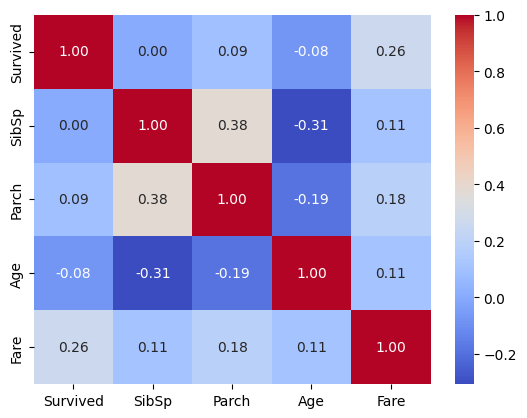

In [29]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, fmt='.2f', cmap = 'coolwarm')

#Fare seems to be the only feature that has a substantial correlation with survival

In [30]:
#mean of survival by SibSp
train[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

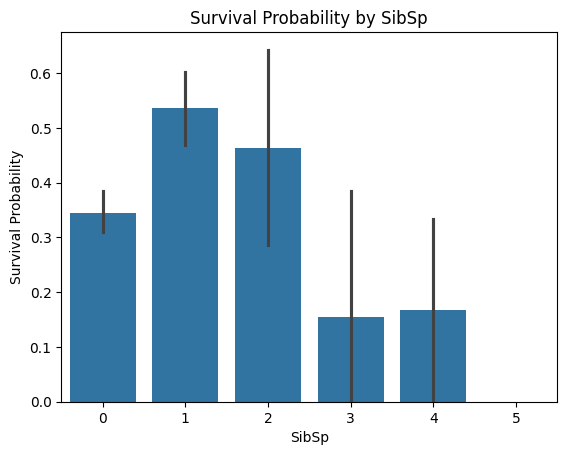

In [31]:
sns.barplot(x='SibSp', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

In [32]:
#value counts of the Parch column

train['Parch'].value_counts(dropna=False)

,count
Parch,
0,678
1,118
2,70
5,5
3,5
4,4
6,1


In [33]:
#mean of survival by Parch

train[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

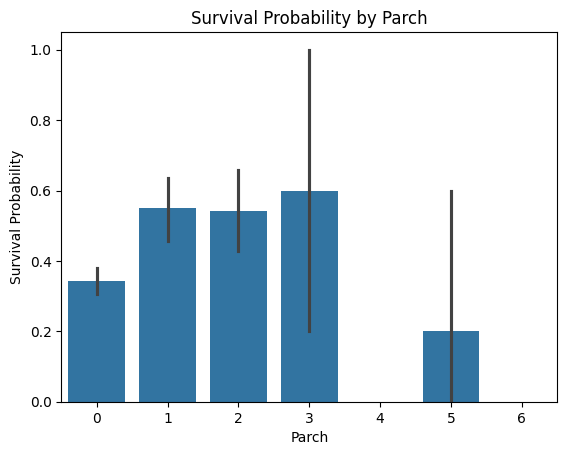

In [34]:
sns.barplot(x='Parch', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')


In [35]:
#null values in Age column
train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

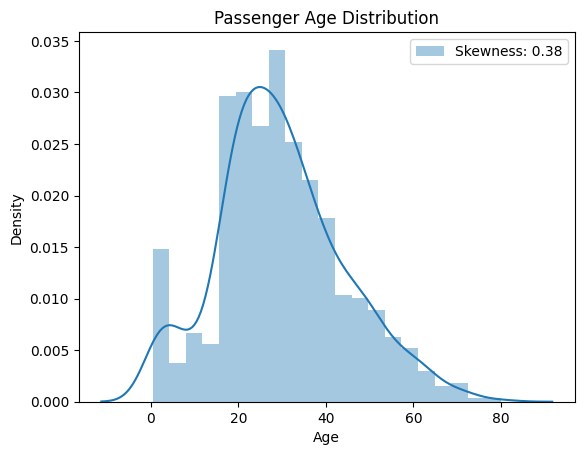

In [36]:
#passenger age distribution

sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc='best')
plt.title('Passenger Age Distribution')

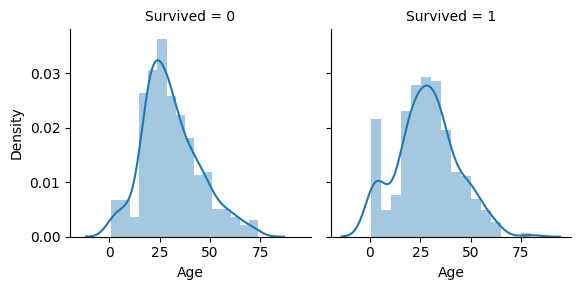

In [37]:
#age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Age Distribution by Survival')

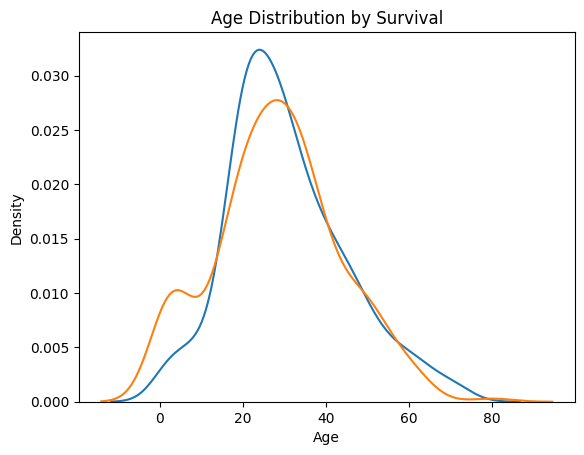

In [38]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label='Did not Survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label='Survived')
plt.xlabel('Age')
plt.title('Age Distribution by Survival')

In [39]:
#null values of Fare column
train['Fare'].isnull().sum()

0

Text(0.5, 1.0, 'Passenger Fare Distribution')

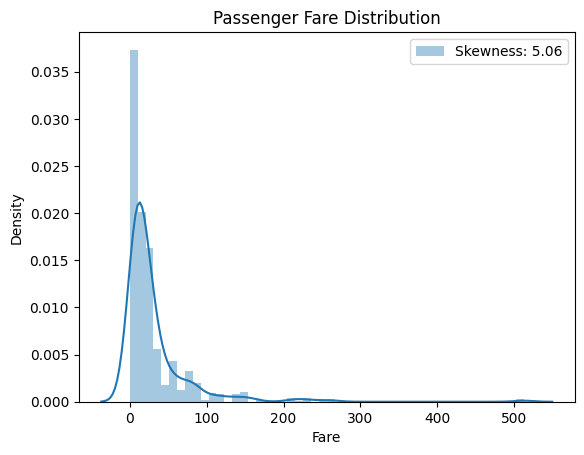

In [40]:
#passenger fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc='best')
plt.title('Passenger Fare Distribution')


In [41]:
#drop ticket and cabin features from training and test set
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

In [42]:
# missing values in training set

train.isnull().sum().sort_values(ascending=False)

,0
Age,170
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Fare,0


In [43]:
#compute the most frequent value of embarked in training set

mode = train.Embarked.dropna().mode()[0]
mode

'S'

In [44]:
#fill missing value value in embarked with mode

train['Embarked'].fillna(mode, inplace=True)

In [45]:
#missing values in test set

test.isnull().sum().sort_values(ascending=False)

,0
Age,86
Fare,1
PassengerId,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Embarked,0


In [46]:
#compute median of fare in test set

median = test.Fare.dropna().median()
median

14.4542

In [47]:
#fill missing value in fare with median

test['Fare'].fillna(median, inplace=True)

In [48]:
#combine training set and test set

combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [49]:
#missing values in the combined dataset

combine.isnull().sum().sort_values(ascending=False)

,0
Survived,418
Age,256
PassengerId,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [50]:
#convert sex into numerical values where 0 = male and 1 = female

combine['Sex'] = combine['Sex'].map({'male':0, 'female':1})

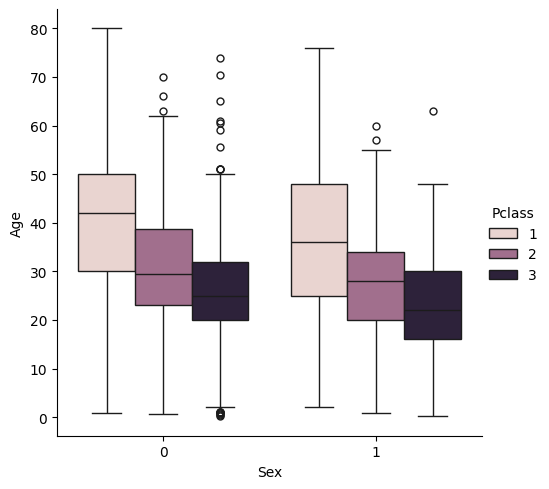

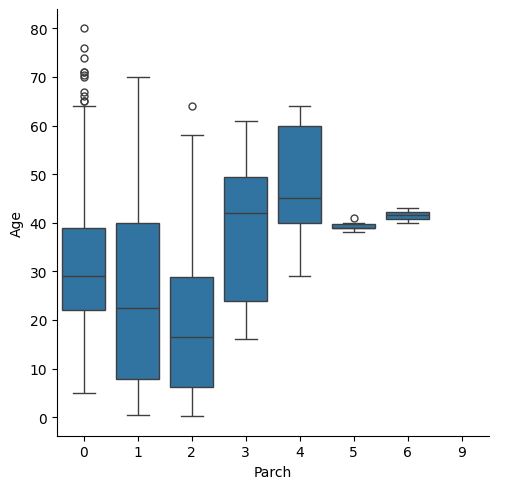

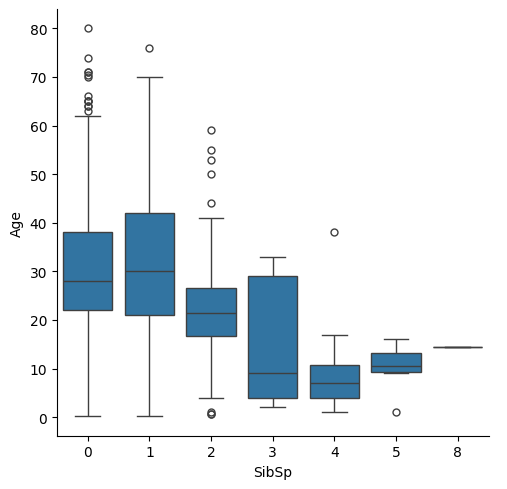

In [51]:
import seaborn as sns

sns.catplot(y='Age', x='Sex', hue='Pclass', data=combine, kind='box')
sns.catplot(y='Age', x='Parch', data=combine, kind='box')
sns.catplot(y='Age', x='SibSp', data=combine, kind='box')

<Axes: >

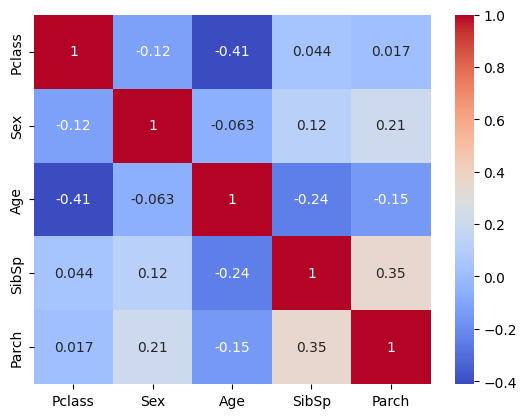

In [52]:
import pandas as pd
import seaborn as sns

numeric_data = combine.drop(['Survived' ,'Name', 'PassengerId', 'Fare'],axis=1).select_dtypes(include=np.number)
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')

In [53]:
#check number of missing ages
age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

In [54]:
# loop through list and impute missing ages

for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp'])
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]['Pclass'])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [55]:
#make sure there is no more missing ages

combine['Age'].isnull().sum()

0

Text(0.5, 1.0, 'Passenger Fare Distribution')

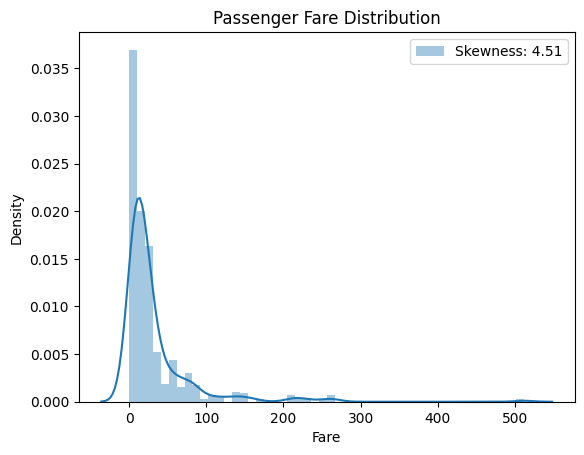

In [56]:
#passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc='best')
plt.title('Passenger Fare Distribution')


In [57]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution after log transformation')

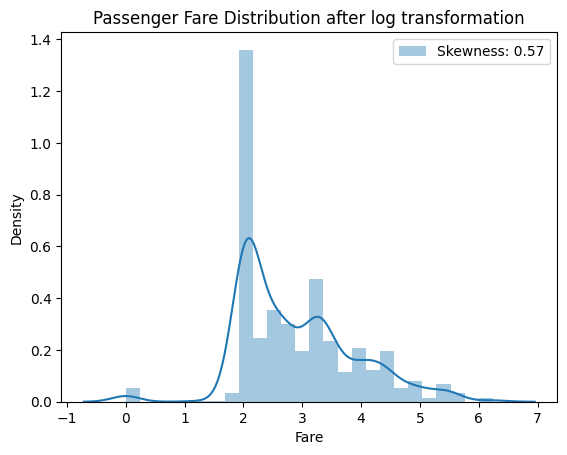

In [58]:
# Passenger fare distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc='best')
plt.title('Passenger Fare Distribution after log transformation')


In [59]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [60]:
#get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [61]:
#value counts of title

combine['Title'].value_counts()

,count
Title,
Mr,753
Miss,255
Mrs,197
Master,60
Rev,8
Dr,8
Col,4
Mlle,2
Major,2


In [62]:
# number of unique title

combine['Title'].nunique()

18

In [63]:
# simplify title

combine['Title'] = combine['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

<Axes: xlabel='count', ylabel='Title'>

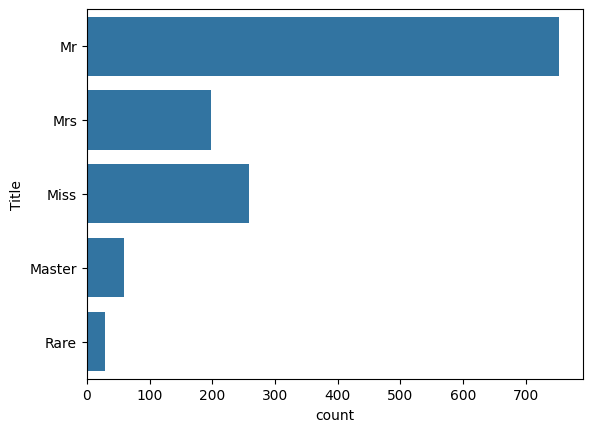

In [64]:
sns.countplot(combine['Title'])

In [65]:
# mean of survival by name title

combine[['Title', 'Survived']].groupby('Title', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1.0, 'Mean of survival by Title')

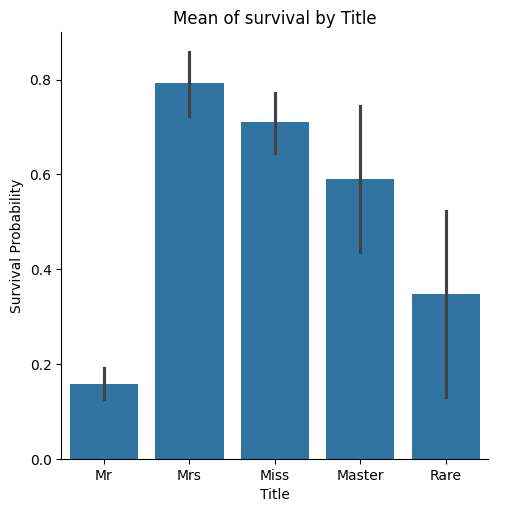

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='Title', y='Survived', data=combine, kind='bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [67]:
#drop name column

combine = combine.drop(['Name'], axis=1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


In [68]:
# Calculate family size from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [69]:
#mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [70]:
#create ISAlone feature

combine['ISAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'ISAlone'] = 1

In [71]:
# mean of survival by ISAlone

combine[['ISAlone', 'Survived']].groupby('ISAlone', as_index=False).mean().sort_values(by='Survived', ascending=False)

,ISAlone,Survived
0,0,0.514535
1,1,0.303538


In [72]:
#Drop SibSp , Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,ISAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


In [73]:
#create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [74]:
#Assign ordinals to each age band

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <=48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034, 'Age'] = 4

In [75]:
combine = combine.drop(['AgeBand'], axis=1)


In [76]:
combine[['Age', 'Pclass']].dtypes

,0
Age,float64
Pclass,int64


In [77]:
#Convert ordinal age into integer

combine['Age'] = combine['Age'].astype(int)
combine['Age'].dtype

dtype('int64')

In [78]:
# create Age*class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


In [79]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,ISAlone,Age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [80]:
#encode title and embarked feature

combine = pd.get_dummies(combine, columns=['Title'])
combine = pd.get_dummies(combine, columns=['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,ISAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,False,False,True,False,False,False,False,True
1,2,1.0,1,1,2,4.266662,0,2,False,False,False,True,False,True,False,False
2,3,1.0,3,1,1,2.070022,1,3,False,True,False,False,False,False,False,True
3,4,1.0,1,1,2,3.972177,0,2,False,False,False,True,False,False,False,True
4,5,0.0,3,0,2,2.085672,1,6,False,False,True,False,False,False,False,True


In [81]:
#divide fare into four bands

combine['FareBand'] = pd.qcut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean().sort_values(by='FareBand')

,FareBand,Survived
0,"(-0.001, 2.066]",0.197309
1,"(2.066, 2.671]",0.303571
2,"(2.671, 3.421]",0.456221
3,"(3.421, 6.239]",0.594470


In [82]:
#assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3


In [83]:
#convert fare into integer

combine['Fare'] = combine['Fare'].astype(int)

In [84]:
#drop fareband feature

combine = combine.drop(['FareBand'], axis=1)

In [85]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,ISAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,2,1.0,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,3,1.0,3,1,1,1,1,3,False,True,False,False,False,False,False,True
3,4,1.0,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,5,0.0,3,0,2,1,1,6,False,False,True,False,False,False,False,True


In [88]:
#separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [89]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,ISAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,2,1.0,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,3,1.0,3,1,1,1,1,3,False,True,False,False,False,False,False,True
3,4,1.0,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,5,0.0,3,0,2,1,1,6,False,False,True,False,False,False,False,True


In [90]:
#drop passenger ID column from and training set

train = train.drop(['PassengerId'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,ISAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,1.0,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,1.0,3,1,1,1,1,3,False,True,False,False,False,False,False,True
3,1.0,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,0.0,3,0,2,1,1,6,False,False,True,False,False,False,False,True


In [91]:
#convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype(int)
train.head()

,Survived,Pclass,Sex,Age,Fare,ISAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,1,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,1,3,1,1,1,1,3,False,True,False,False,False,False,False,True
3,1,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,0,3,0,2,1,1,6,False,False,True,False,False,False,False,True


In [92]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,ISAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,2,1,1,6,False,False,True,False,False,False,True,False
882,893,NaN,3,1,2,1,0,6,False,False,False,True,False,False,False,True
883,894,NaN,2,0,3,1,1,6,False,False,True,False,False,False,True,False
884,895,NaN,3,0,1,1,1,3,False,False,True,False,False,False,False,True
885,896,NaN,3,1,1,1,0,3,False,False,False,True,False,False,False,True


In [93]:
#drop passenger survived column from test set

test = test.drop(['Survived'], axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,ISAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,False,False,True,False,False,False,True,False
882,893,3,1,2,1,0,6,False,False,False,True,False,False,False,True
883,894,2,0,3,1,1,6,False,False,True,False,False,False,True,False
884,895,3,0,1,1,1,3,False,False,True,False,False,False,False,True
885,896,3,1,1,1,0,3,False,False,False,True,False,False,False,True


In [95]:
X_train = train.drop(['Survived'], axis=1)
Y_train = train['Survived']
X_test = test.drop(['PassengerId'], axis=1).copy()
print("X_train shape: ", x_train.shape)
print("Y_train shape: ",Y_train.shape)
print("X_train shape: ",X_test.shape)


X_train shape:  (881, 14)
Y_train shape:  (881,)
X_train shape:  (418, 14)


In [96]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.93

In [97]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

In [98]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.56

In [99]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.11

In [100]:
Perceptron = Perceptron()
Perceptron.fit(X_train, Y_train)
Y_pred = Perceptron.predict(X_test)
acc_Perceptron = round(Perceptron.score(X_train, Y_train) * 100, 2)
acc_Perceptron

79.57

In [101]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

In [104]:

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

81.04

In [106]:
Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train, Y_train)
Y_pred = Decision_Tree.predict(X_test)
acc_decision_tree = round(Decision_Tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.7

In [107]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.7

In [108]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.7 MB/s eta 0:00:00


In [109]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier()   #create the model
catboost_model.fit(X_train, Y_train)    #train the model
Y_pred = catboost_model.predict(X_test)  #make predictions
acc_catboost = round(catboost_model.score(X_train, Y_train) * 100, 2)  #calculate accuracy


Learning rate set to 0.00976
0:	learn: 0.6868136	total: 48.1ms	remaining: 48s
1:	learn: 0.6798485	total: 49.7ms	remaining: 24.8s
2:	learn: 0.6729520	total: 51ms	remaining: 16.9s
3:	learn: 0.6669729	total: 52.1ms	remaining: 13s
4:	learn: 0.6607853	total: 53.5ms	remaining: 10.6s
5:	learn: 0.6554568	total: 54.7ms	remaining: 9.05s
6:	learn: 0.6500727	total: 56ms	remaining: 7.94s
7:	learn: 0.6437982	total: 57.3ms	remaining: 7.11s
8:	learn: 0.6398272	total: 58.4ms	remaining: 6.42s
9:	learn: 0.6351628	total: 59.5ms	remaining: 5.89s
10:	learn: 0.6305969	total: 60.4ms	remaining: 5.43s
11:	learn: 0.6252274	total: 61.5ms	remaining: 5.07s
12:	learn: 0.6203165	total: 62.6ms	remaining: 4.75s
13:	learn: 0.6163249	total: 63.5ms	remaining: 4.47s
14:	learn: 0.6126752	total: 64.5ms	remaining: 4.23s
15:	learn: 0.6078515	total: 65.5ms	remaining: 4.03s
16:	learn: 0.6033553	total: 66.6ms	remaining: 3.85s
17:	learn: 0.5984437	total: 68.1ms	remaining: 3.71s
18:	learn: 0.5935188	total: 69ms	remaining: 3.56s
19:

In [110]:
acc_catboost


85.7

In [111]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gaussian Naive Bayes', 'Perceptron',
              'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost'],
    'Score': [acc_log, acc_svc, acc_knn, acc_gaussian, acc_Perceptron, acc_linear_svc, acc_sgd, acc_decision_tree, acc_random_forest, acc_catboost]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Decision Tree,85.70
8,Random Forest,85.70
9,CatBoost,85.70
2,KNN,84.56
1,Support Vector Machines,83.09
6,Stochastic Gradient Descent,81.04
0,Logistic Regression,80.93
5,Linear SVC,80.25
4,Perceptron,79.57
3,Gaussian Naive Bayes,79.11


In [115]:
# create a list which contains classifiers
from sklearn.linear_model import Perceptron


classifiers =[]
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier(n_estimators=100))
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [116]:
#create a list which  contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6671644	total: 5.05ms	remaining: 1s
5:	learn: 0.6624480	total: 6.11ms	remaining: 1.01s
6:	learn: 0.6564807	total: 7.19ms	remaining: 1.02s
7:	learn: 0.6508291	total: 8.23ms	remaining: 1.02s
8:	learn: 0.6458787	total: 9.31ms	remaining: 1.02s
9:	learn: 0.6404126	total: 10.4ms	remaining: 1.03s
10:	learn: 0.6355068	total: 11.4ms	remaining: 1.03s
11:	learn: 0.6301715	total: 12.5ms	remaining: 1.03s
12:	learn: 0.6268281	total: 13.3ms	remaining: 1.01s
13:	learn: 0.6224645	total: 14.4ms	remaining: 1.01s
14:	learn: 0.6181694	total: 15.4ms	remaining: 1.01s
15:	learn: 0.6130410	total: 16.4ms	remaining: 1.01s
16:	learn: 0.6077487	total: 17.5ms	remaining: 1.01s
17:	learn: 0.6028485	total: 19.2ms	remaining: 1.04s
18:	learn: 0.5982086	total: 20.4ms	remaining: 1.05s
19:	learn: 0.5934682	total: 21.7ms	remaining: 1.06s
20:	learn: 0.5894552	total: 23.6ms	remaining: 1.1s
21:	learn: 0.5852499	total: 25.1ms	remaining: 1.12s
22:	learn: 0.5809276	to

In [117]:
# mean and standard deviation of cross validation results for each classifier

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [118]:
cv_res = pd.DataFrame({'Cross Validation Mean':cv_means, 'CrossValerrors': cv_std, 'Algorithm': ['LogisticRegression','SVC','KNN','GaussianNB','Perceptron','LinearSVC','SGDClassifier','DecisionTree','RandomForest','CatBoost']})
cv_res.sort_values(by='Cross Validation Mean', ascending=False, ignore_index=True)

,Cross Validation Mean,CrossValerrors,Algorithm
0,0.821782,0.042574,SVC
1,0.817275,0.035240,KNN
2,0.815028,0.036378,CatBoost
3,0.804801,0.029279,LogisticRegression
4,0.800268,0.026123,RandomForest
5,0.800243,0.033294,LinearSVC
6,0.790041,0.024733,DecisionTree
7,0.783223,0.041915,GaussianNB
8,0.759321,0.057150,SGDClassifier
9,0.733287,0.043881,Perceptron


In [119]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.616 total time=   0.1s
[CV 2/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.614 total time=   0.1s
[CV 3/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.614 total time=   0.1s
[CV 4/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.614 total time=   0.1s
[CV 5/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.614 total time=   0.1s
[CV 1/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.1s
[CV 2/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.614 total time=   0.1s
[CV 3/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.614 total time=   0.1s
[CV 4/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.614 total time=   0.1s
[CV 5/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.614 total time=   0.1s
[CV 1/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.616 total time=   0.1s
[CV 2/5] END ...C=0.001, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [120]:
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [126]:
# training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [127]:
# mean cross validation score

cross_val_score(svc, X_train, Y_train, cv=10, scoring='accuracy').mean()

0.8297242083758938

In [128]:
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [129]:
len(Y_pred)

418

In [130]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [131]:
ss.shape

(418, 2)

In [132]:
# create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [133]:
submit.shape

(418, 2)

In [134]:
# create and save csv file

submit.to_csv('svm_titanic.csv', index = False)